# Exploratory Data Analysis

## Import Basic Libraries 

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import seaborn as sns 
import re

In [2]:
vg = pd.read_csv("video_games_sales.csv") #vg = video games 
vg.info() #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
vg.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vg.tail()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
vg.describe().T #shows the basic summary stats of each numeric variable

,count,mean,std,min,25%,50%,75%,max
rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
na_sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
eu_sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
jp_sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
other_sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
global_sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


The highest video game sales occurred in North America, with the assumption that consumers in the U.S. were one of the main buyers. North American sales make up about half of the global sales.

In [6]:
vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
print(f"Columns Names in the Dataframe:\n{vg.columns.tolist()}\n")
print(f"Quantity of of null/missing data entries:\n{vg.isnull().sum()}")

Columns Names in the Dataframe:
['Sales Rank', 'name', 'platform', 'year', 'genre', 'publisher', 'North American Sales (in millions)', 'European Sales (in millions)', 'Japan Sales (in millions)', 'Other Sales (in millions)', 'Global Sales (in millions)']

Quantity of of null/missing data entries:
Sales Rank                              0
name                                    0
platform                                0
year                                  271
genre                                   0
publisher                              58
North American Sales (in millions)      0
European Sales (in millions)            0
Japan Sales (in millions)               0
Other Sales (in millions)               0
Global Sales (in millions)              0
dtype: int64


In [7]:
vg

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


The dataframe has been updated with more descriptive variable names to improve model development and enhance machine learning.

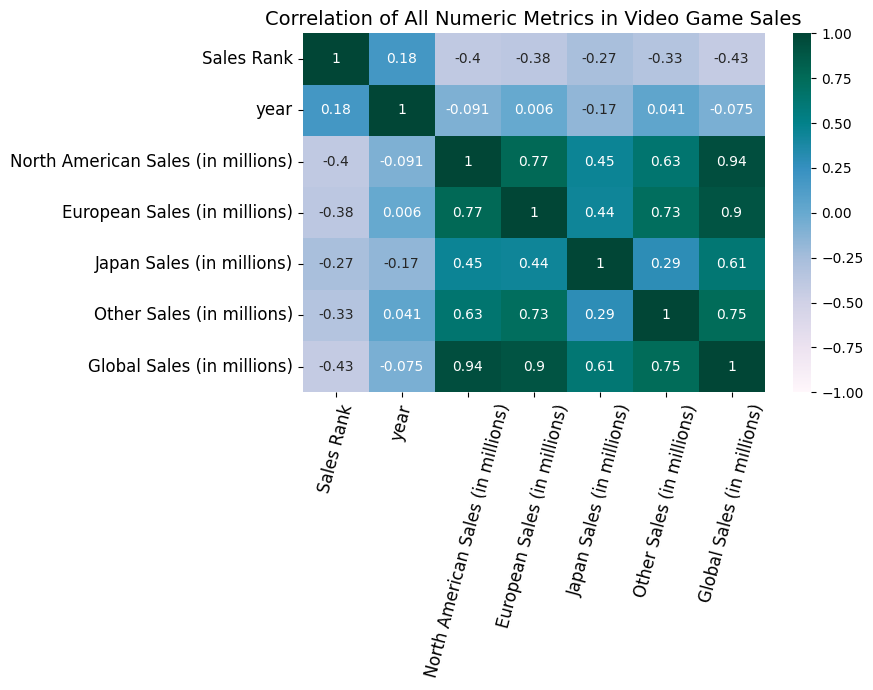

In [8]:
numeric_vg = vg.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_vg.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation of All Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("Correlation of All Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

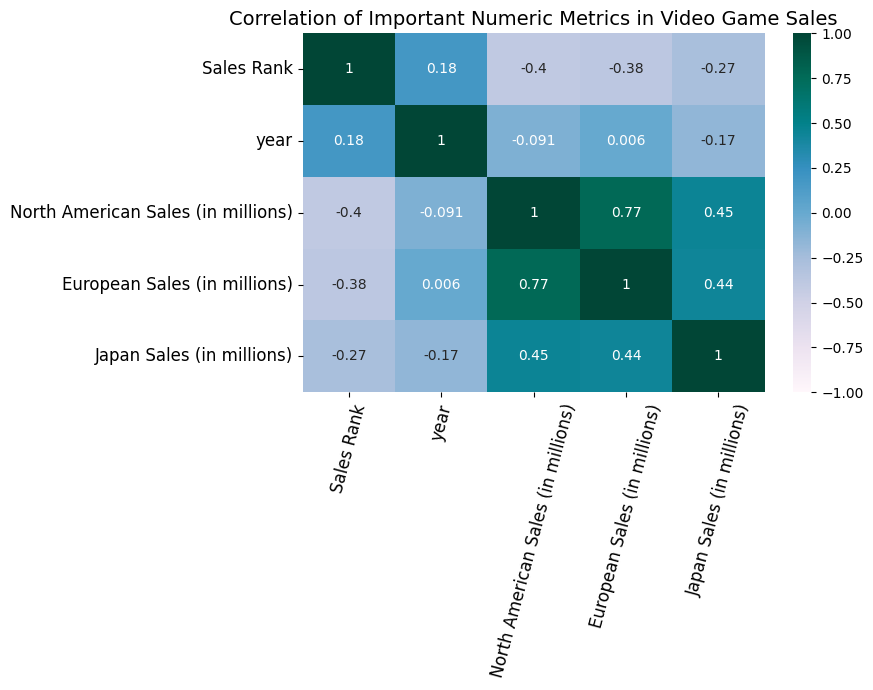

In [9]:
numeric_vg1 = vg.select_dtypes(include = ["int64", "float64"])
numeric_vg2 = numeric_vg1.drop(columns = ["Other Sales (in millions)", "Global Sales (in millions)"])
corr_matrix = numeric_vg2.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation of Important Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("Correlation of Important Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

The correlation matrix above reveals potential collinearity, especially between North American Sales and Global Sales, which makes sense since North American Sales make up about half of all Global Sales. There is mild correlation between each of the sales variables, mainly due to how all sales go into calculating the global sales. 

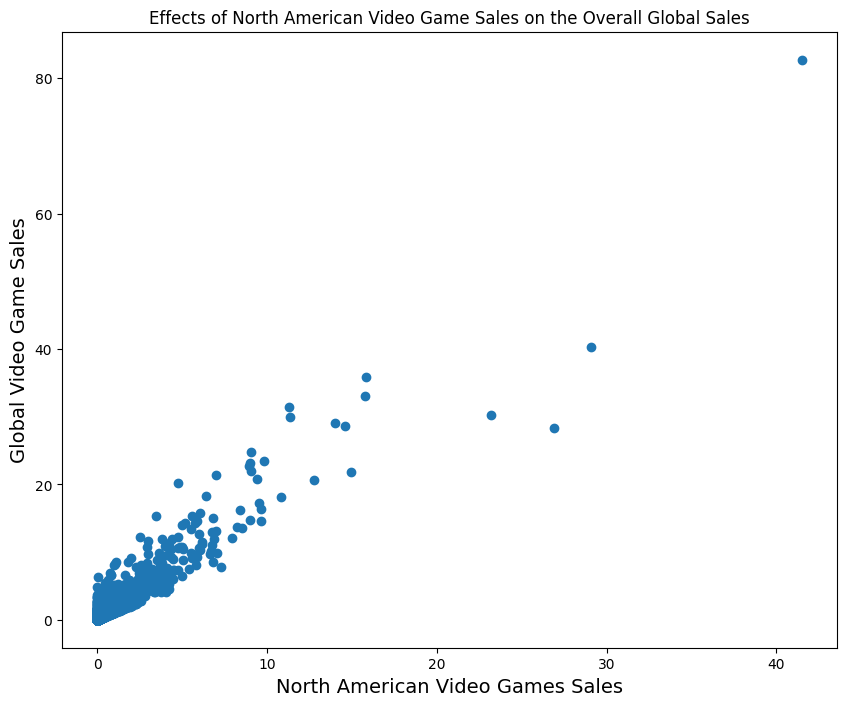

In [10]:
north_american = vg["North American Sales (in millions)"]
global_sales = vg["Global Sales (in millions)"]
plt.figure(figsize = (10, 8))
plt.scatter(north_american, global_sales)
plt.title("Effects of North American Video Game Sales on the Overall Global Sales")
plt.xlabel("North American Video Games Sales", fontsize = 14)
plt.ylabel("Global Video Game Sales", fontsize = 14)
plt.show()

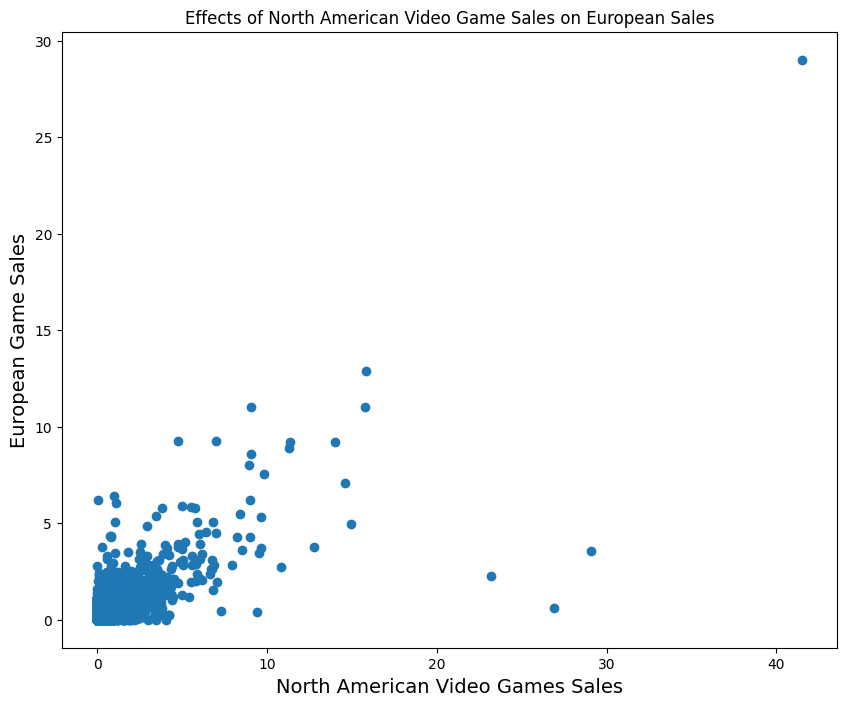

In [11]:
north_american = vg["North American Sales (in millions)"]
european = vg["European Sales (in millions)"]
plt.figure(figsize = (10, 8))
plt.scatter(north_american, european)
plt.title("Effects of North American Video Game Sales on European Sales")
plt.xlabel("North American Video Games Sales", fontsize = 14)
plt.ylabel("European Game Sales", fontsize = 14)
plt.show()

## Decision Trees

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
import sklearn.model_selection as ms
from sklearn import metrics
from sklearn import tree
from sklearn.tree import plot_tree

### Predicting the Video Game Platform

In [13]:
print(vg.columns.tolist())
predictors = vg.drop(columns = ["platform"])
response = vg["platform"]
label_encoders = {}
for col in predictors.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    predictors[col] = le.fit_transform(predictors[col])
    label_encoders[col] = le

print(f"Dimensionality of the Predictors:\n{predictors.shape}\n")
print(f"Dimensionality of the Response Variable:\n{response.shape}\n")

['Sales Rank', 'name', 'platform', 'year', 'genre', 'publisher', 'North American Sales (in millions)', 'European Sales (in millions)', 'Japan Sales (in millions)', 'Other Sales (in millions)', 'Global Sales (in millions)']
Dimensionality of the Predictors:
(16598, 10)

Dimensionality of the Response Variable:
(16598,)



In [14]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=123)
vg_decision = DecisionTreeClassifier(random_state = 123) #DecisionTreeClassifier
vg_decision.fit(X_train, y_train)
y_pred = vg_decision.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5175


![Decision Tree Visualization for Video Game Platforms](Decision_Tree_Visualization_for_Video_Game_Platforms.png "Decision Tree")

### Predicting the Quantity of North American Sales 

In [15]:
na_predictors = vg.drop(columns = ["North American Sales (in millions)", "Global Sales (in millions)", "Other Sales (in millions)"])
na_response = vg["North American Sales (in millions)"]
label_encoders = {}

for col in na_predictors.select_dtypes(include = ["object"]).columns:
    le = LabelEncoder()
    na_predictors[col] = le.fit_transform(na_predictors[col])
    label_encoders[col] = le

print(f"Dimensionality of the Predictors:\n{na_predictors.shape}\n")
print(f"Dimensionality of the Response:\n{na_response.shape}\n")

Dimensionality of the Predictors:
(16598, 8)

Dimensionality of the Response:
(16598,)



In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(na_predictors, na_response, test_size = 0.3, random_state = 123)
na_decision = DecisionTreeRegressor(random_state = 123) #DecisionTreeRegressor is made for continuous variables 
na_decision.fit(X_train, Y_train)
y_pred = na_decision.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)  #Mean Squared Error is a common metric for regression
print(f"Mean Squared Error: {mse:.5f}\n")

r2 = r2_score(Y_test, y_pred)
print(f"R² Score: {r2:.5f}")

Mean Squared Error: 0.04374

R² Score: 0.92791


In [17]:
cross_val_r2 = cross_val_score(na_decision, na_predictors, na_response, cv=5, scoring='r2')
print(f"Cross-validated R² Scores: {cross_val_r2}\n")
print(f"Mean Cross-validated R²: {cross_val_r2.mean():.5f}\n")
print(f"Standard Deviation of R² Scores: {cross_val_r2.std():.5f}\n")

Cross-validated R² Scores: [-0.29012313 -0.04795389 -1.02860387  0.09646139 -3.11057255]

Mean Cross-validated R²: -0.87616

Standard Deviation of R² Scores: 1.18247



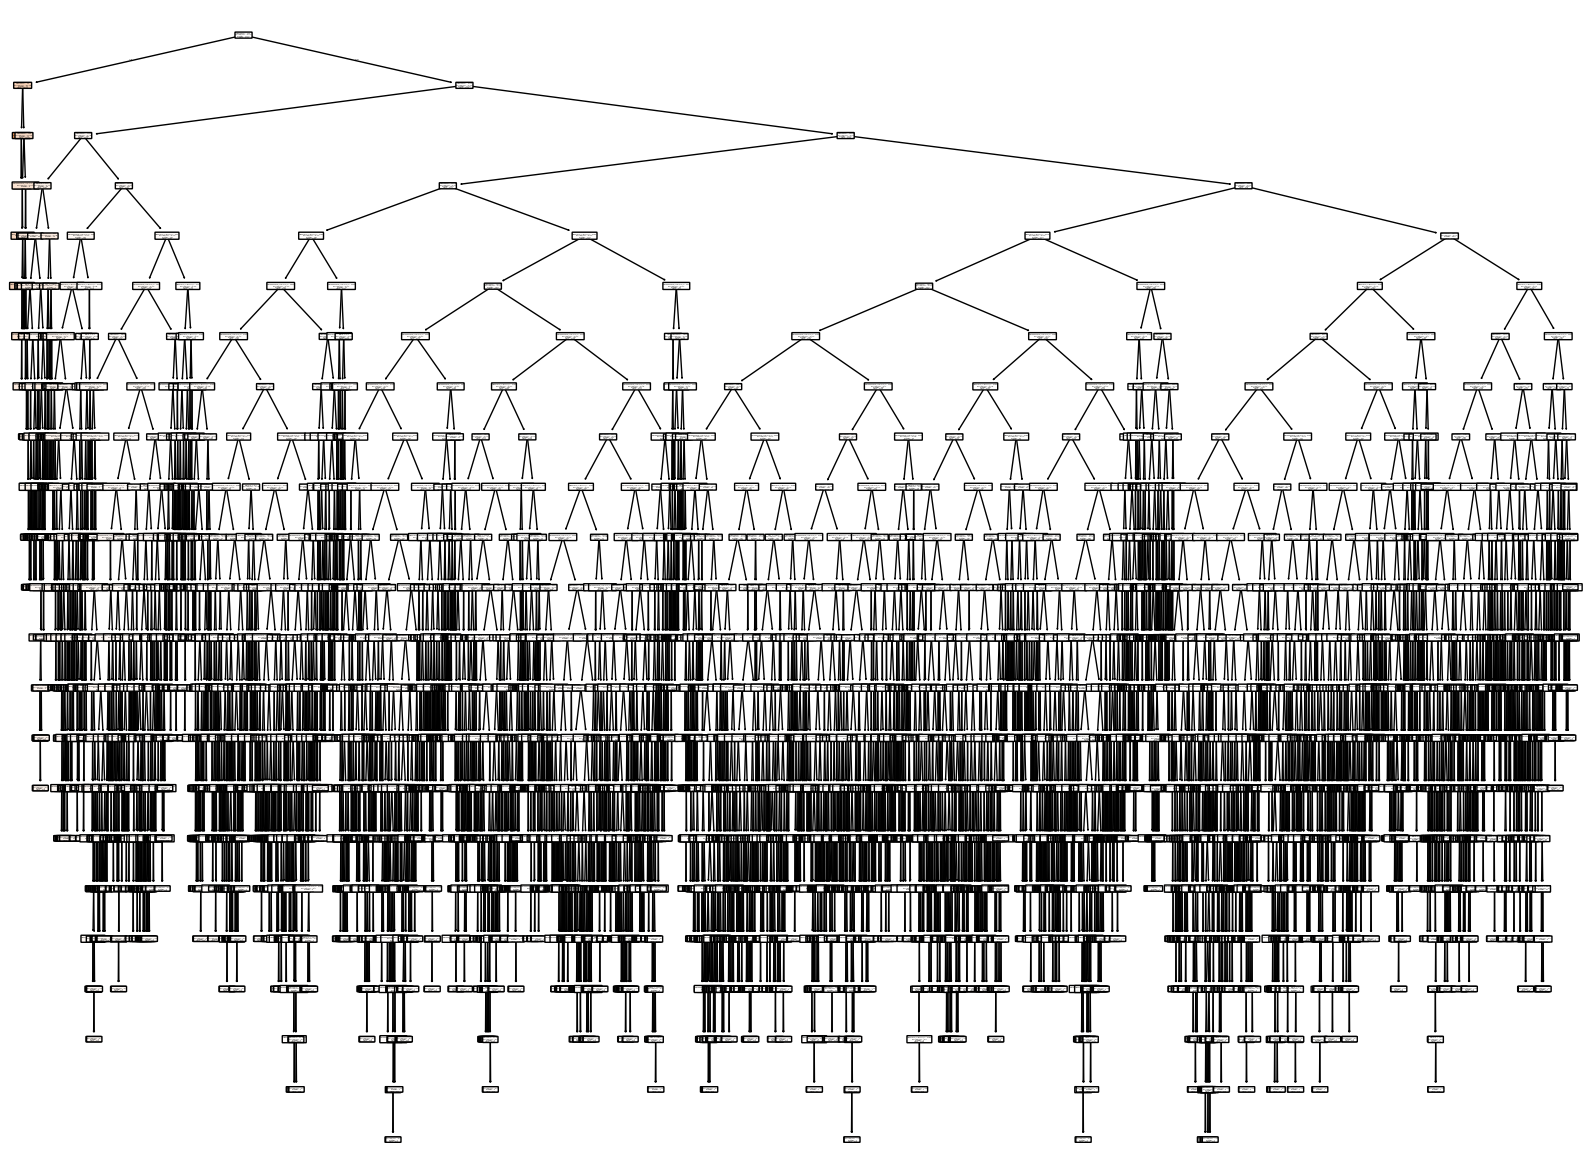

In [18]:
plt.figure(figsize=(20,15))
plot_tree(na_decision, filled=True, feature_names=X_train.columns, class_names=['class1', 'class2'], rounded=True)
plt.show()

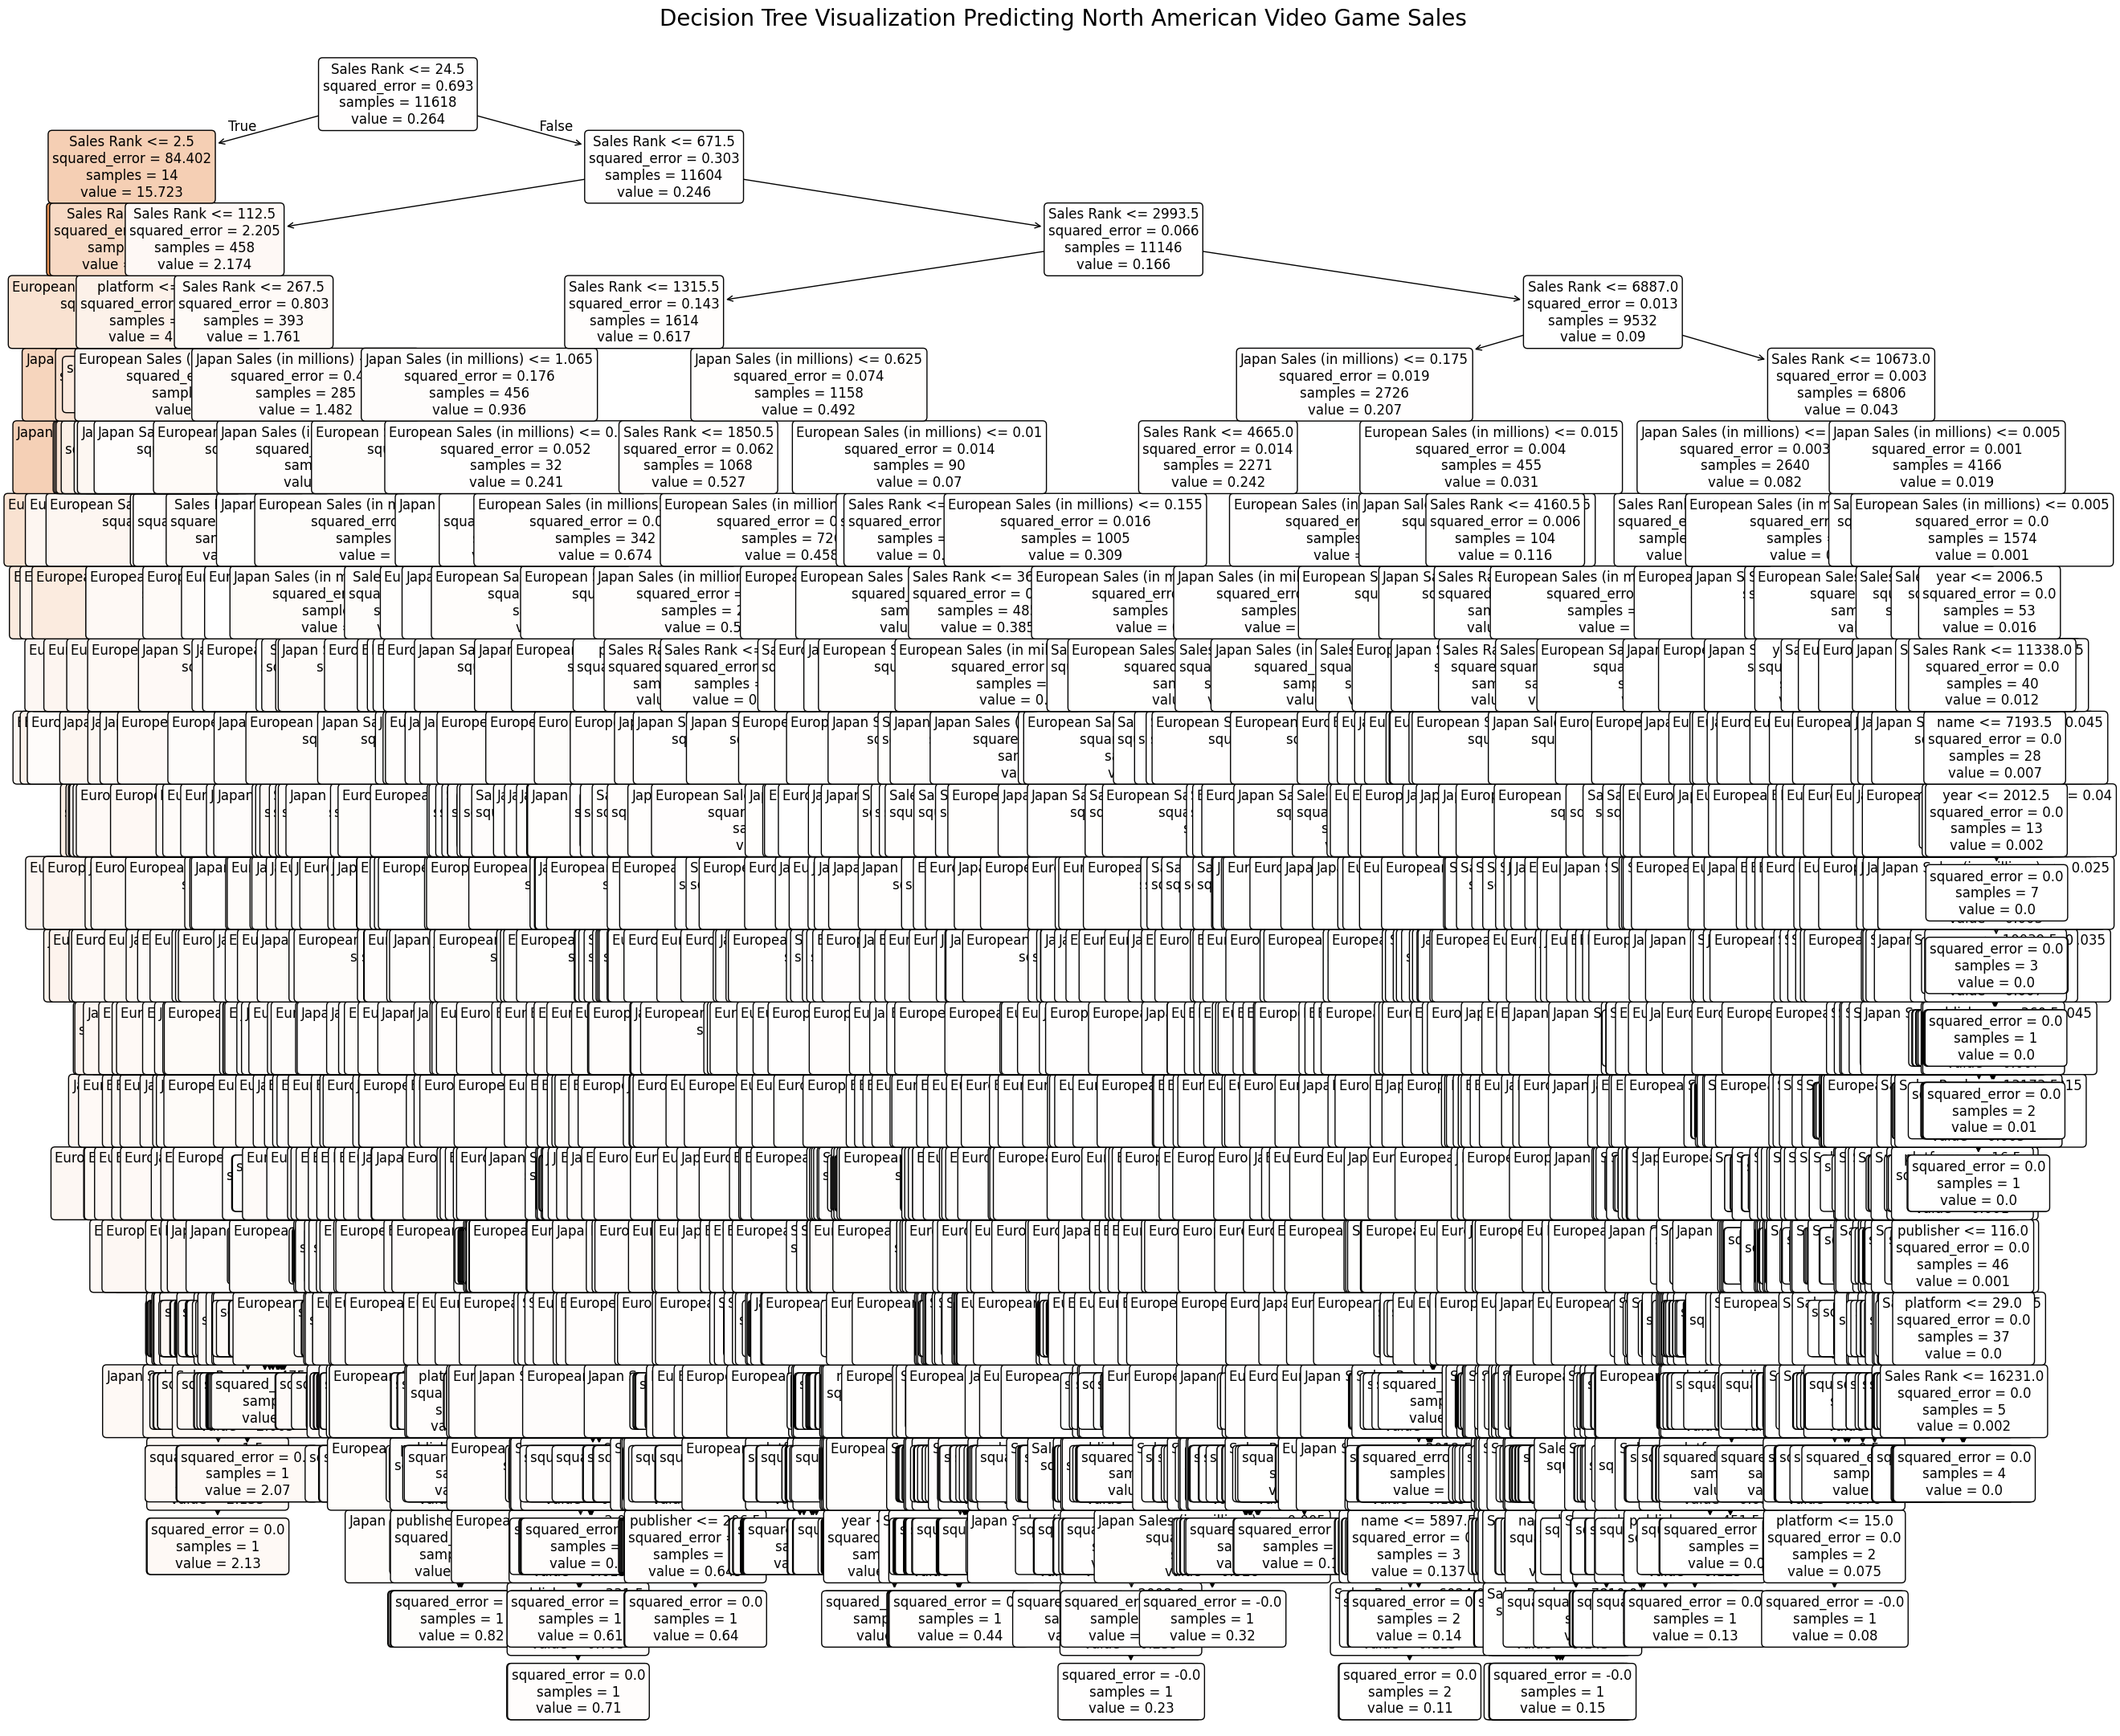

In [19]:
plt.figure(figsize=(30, 27))
plot_tree(na_decision, filled=True, feature_names=X_train.columns, 
          rounded=True, fontsize=12)
plt.title("Decision Tree Visualization Predicting North American Video Game Sales\n", fontsize = 20)
plt.savefig("Decision Tree Visualization Predicting North American Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

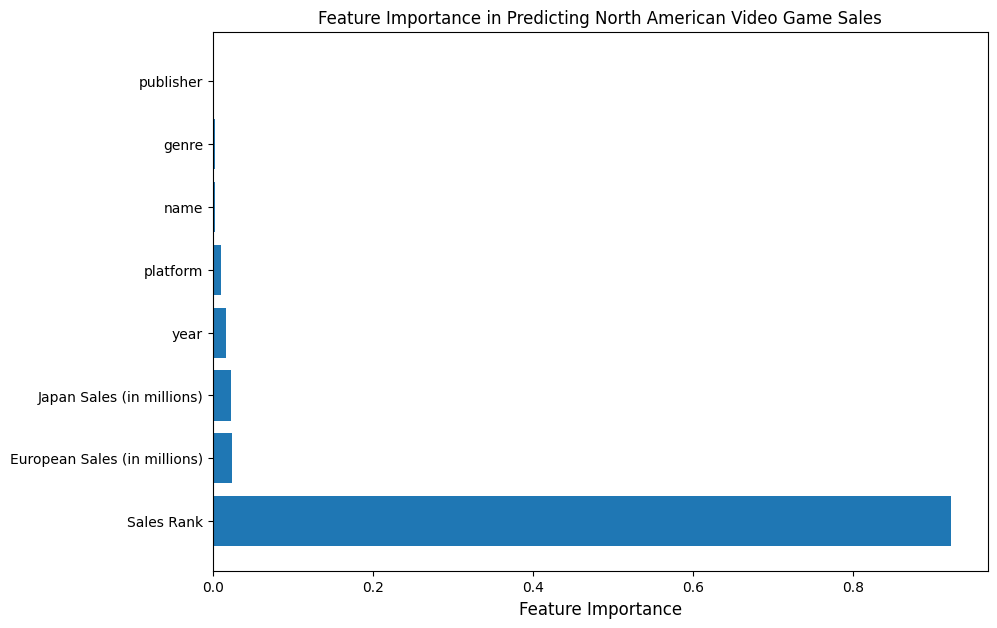

In [20]:
na_decision.fit(X_train, Y_train)
importances = na_decision.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 7))
plt.title("Feature Importance in Predicting North American Video Game Sales")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Feature Importance", fontsize = 12)
plt.savefig("Feature Importance in Predicting North American Video Game Sales_Version1", bbox_inches = "tight", dpi = 300)
plt.show()

### Version 2 

In [21]:
print(vg.info())
#vg = vg.rename(columns = {"na_sales": "North American Sales (in millions)"})
print(f"Columns Names in the Dataframe:\n{vg.columns.tolist()}\n")
print(f"Quantity of of null/missing data entries:\n{vg.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sales Rank                          16598 non-null  int64  
 1   name                                16598 non-null  object 
 2   platform                            16598 non-null  object 
 3   year                                16327 non-null  float64
 4   genre                               16598 non-null  object 
 5   publisher                           16540 non-null  object 
 6   North American Sales (in millions)  16598 non-null  float64
 7   European Sales (in millions)        16598 non-null  float64
 8   Japan Sales (in millions)           16598 non-null  float64
 9   Other Sales (in millions)           16598 non-null  float64
 10  Global Sales (in millions)          16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory

In [22]:
#vg = vg.drop(columns = ["Other Sales (in millions)", "Global Sales (in millions)"], axis = 1)
vg = vg.dropna()
vg.head(10)

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [23]:
X = vg.drop(columns = ["North American Sales (in millions)"])
X = pd.get_dummies(X, drop_first=True) #Encode categorical columns
Y = vg["North American Sales (in millions)"]
XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size= 0.2, random_state=123)

depth_val = np.arange(2,11)
leaf_val = np.arange(1,31, step=10)

grid_s = [{'max_depth': depth_val,'min_samples_leaf': leaf_val}]
model = tree.DecisionTreeRegressor(criterion='friedman_mse')

cv_tree = GridSearchCV(estimator=model,param_grid=grid_s,cv=ms.KFold(n_splits=10))
cv_tree.fit(XTrain, YTrain)

best_depth = cv_tree.best_params_['max_depth']

best_min_samples = cv_tree.best_params_['min_samples_leaf']

print(best_depth, best_min_samples)

10 1


In [24]:
final_model = tree.DecisionTreeRegressor(
    criterion='friedman_mse',
    max_depth=best_depth,
    min_samples_leaf=best_min_samples,
    random_state=123
)
final_model.fit(XTrain, YTrain)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, random_state=123)

In [25]:
# Predictions
YPred = final_model.predict(XTest)

# Metrics
r2 = r2_score(YTest, YPred)
mse = mean_squared_error(YTest, YPred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.5f}")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")

R² Score: 0.87665
MSE: 0.08215
RMSE: 0.28661


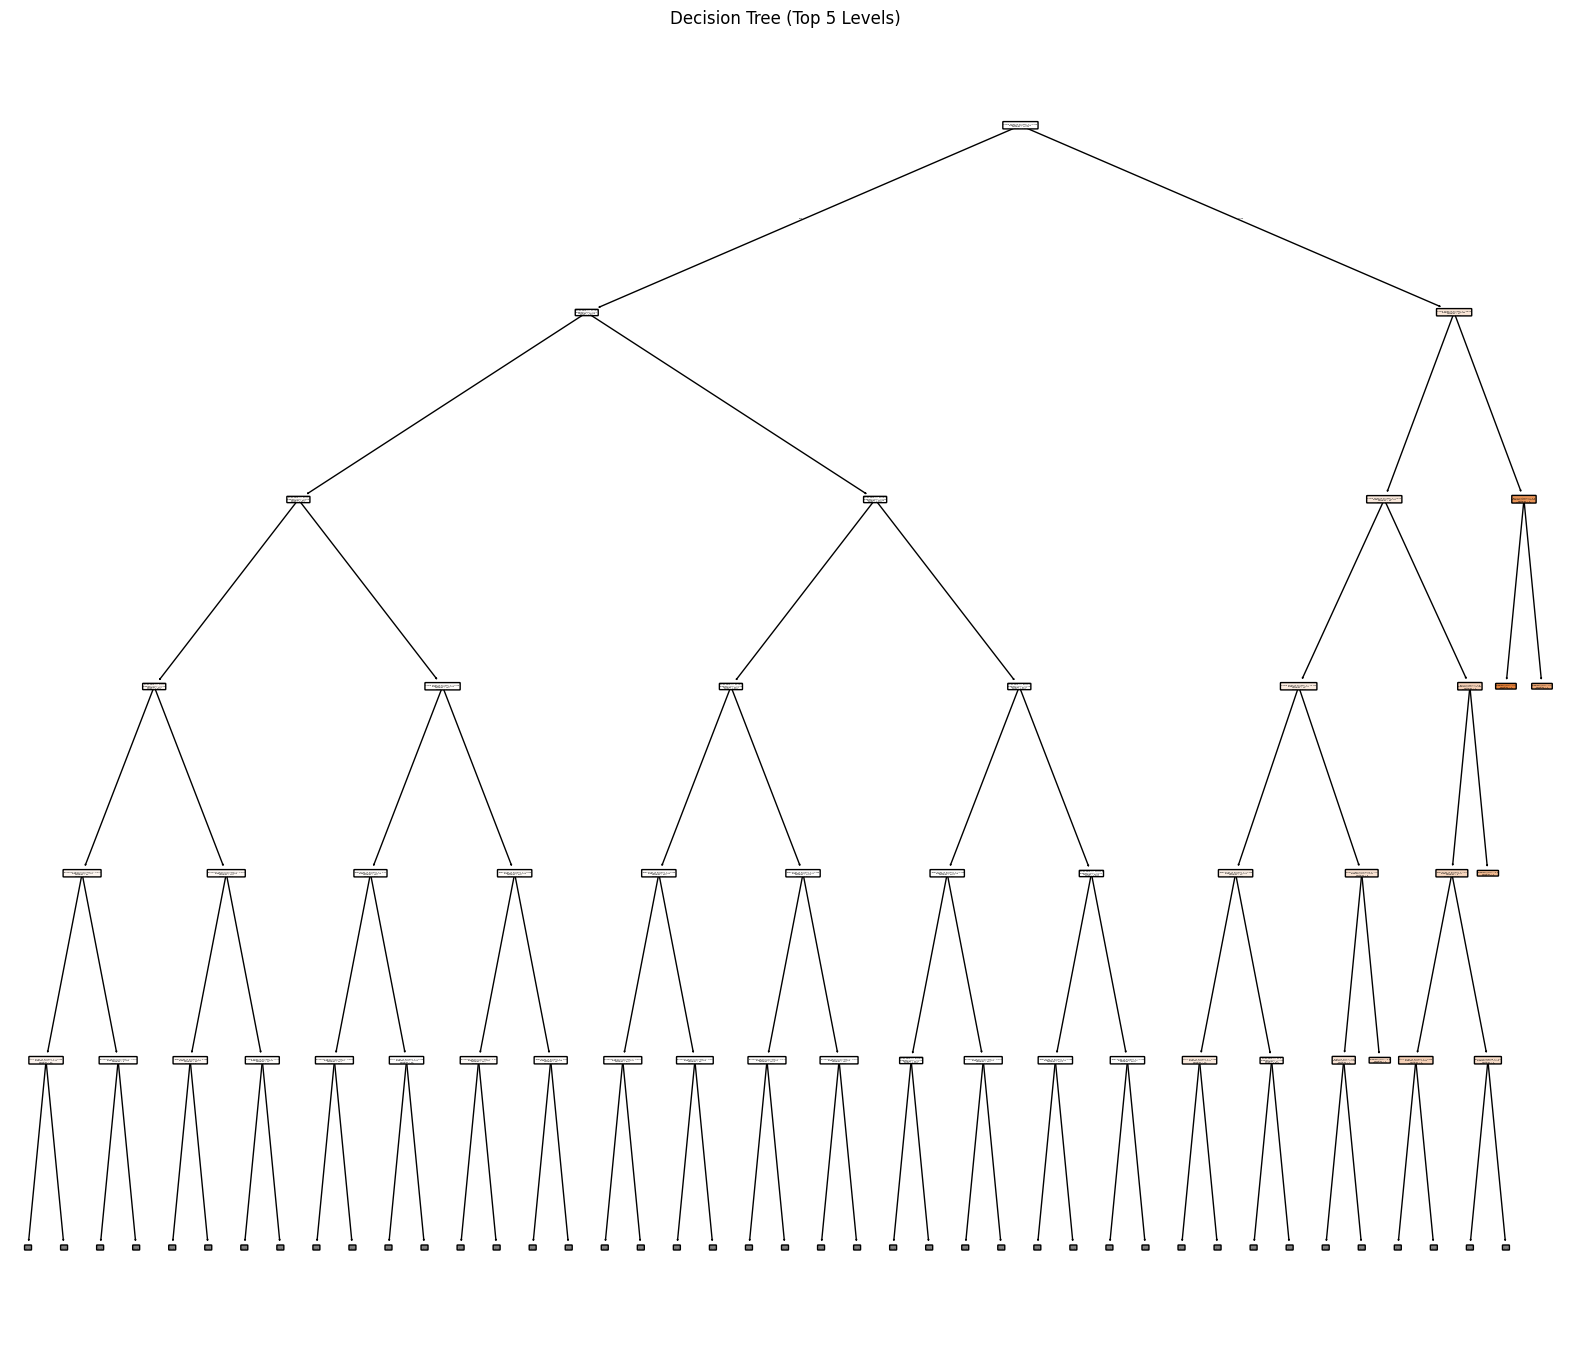

In [26]:
plt.figure(figsize=(20,17))
tree.plot_tree(final_model, max_depth=5, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree (Top 5 Levels)")
plt.show()


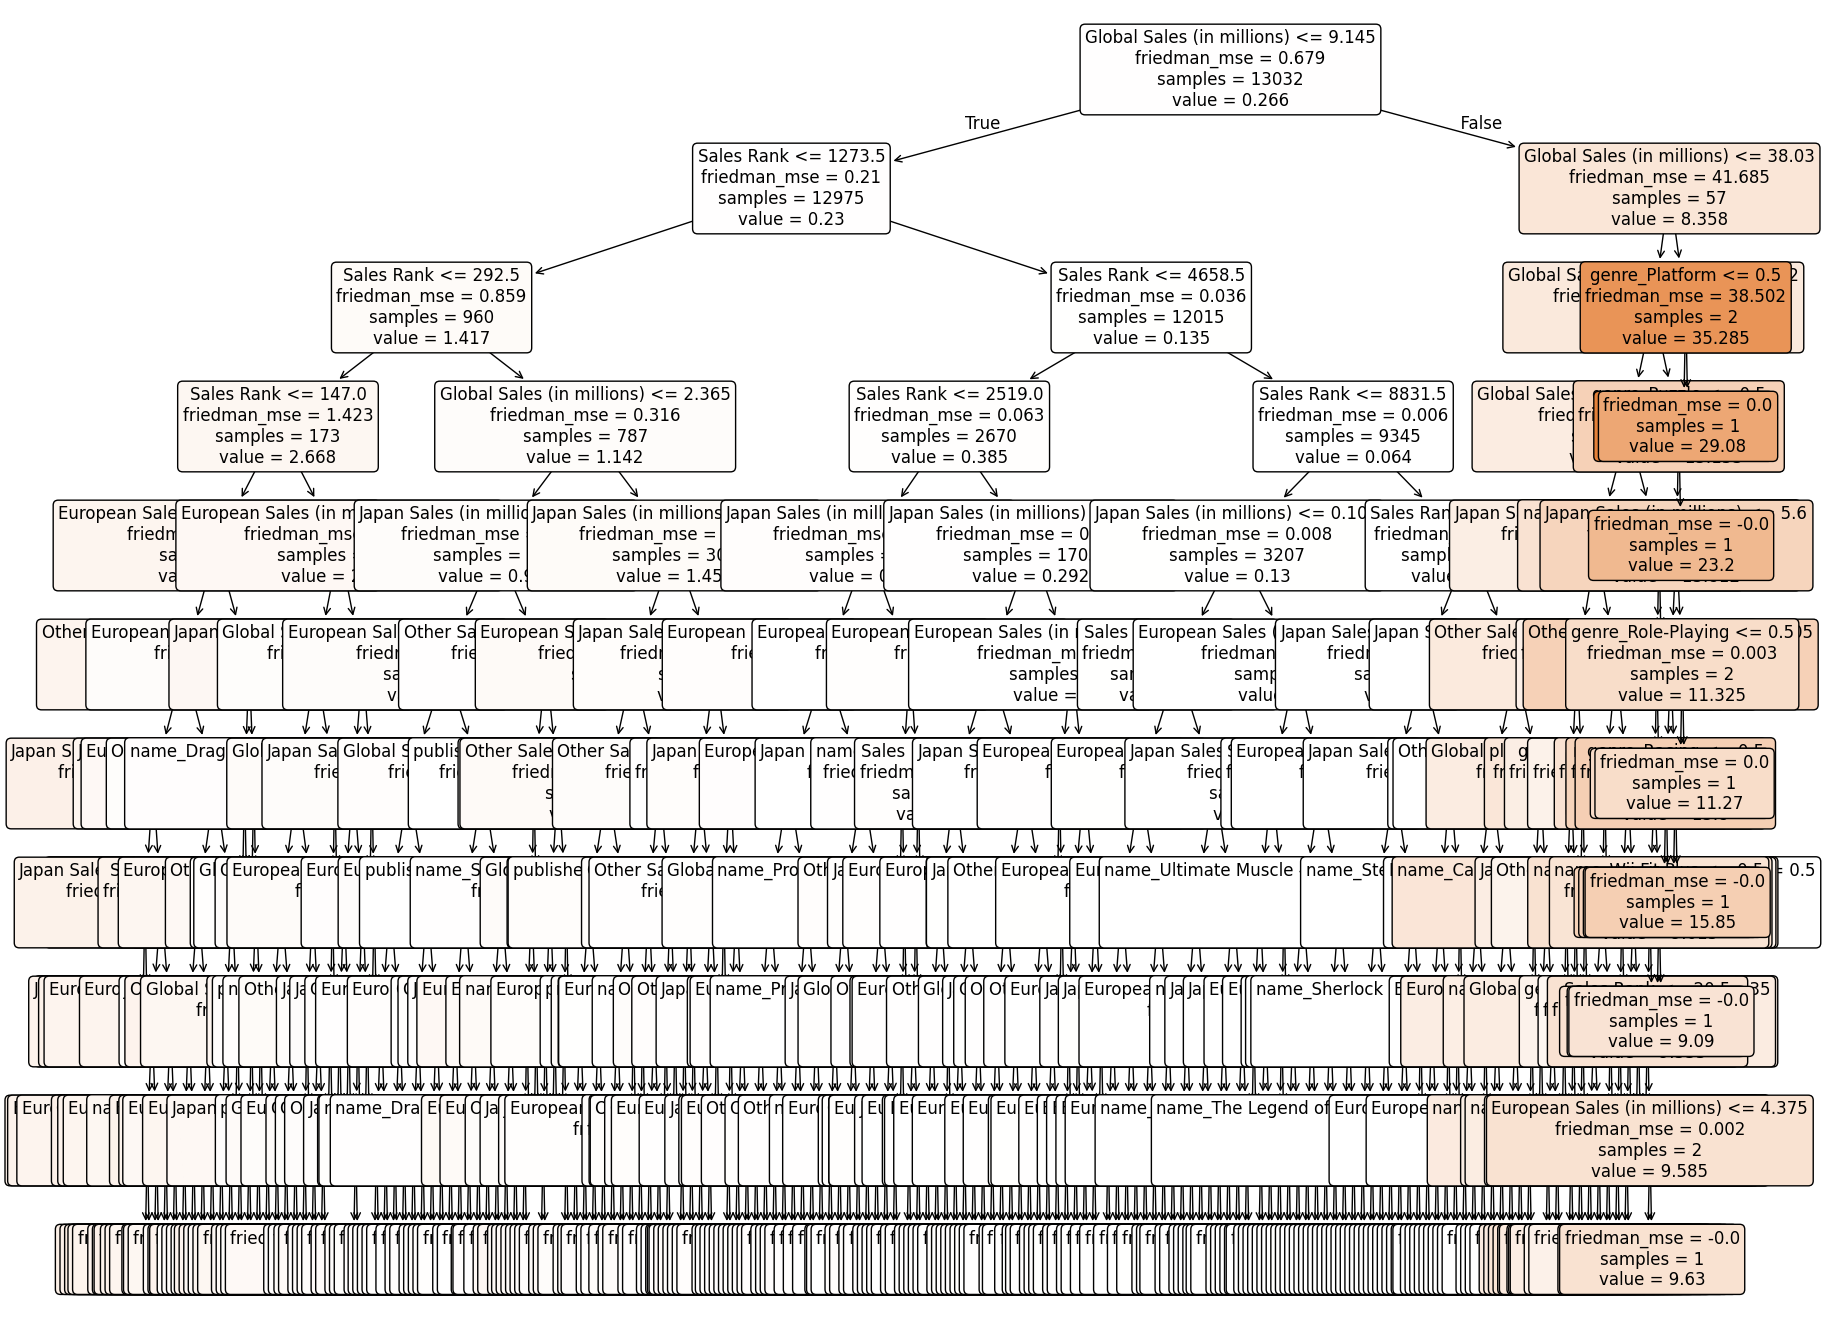

In [27]:
plt.figure(figsize=(20,17))
tree.plot_tree(
    final_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.savefig("Feature Importance in Predicting North American Video Game Sales_Version2.png", bbox_inches = "tight", dpi = 300)
plt.show()